<a href="https://colab.research.google.com/github/sdsc-bw/DataFactory/blob/develop/model_selection/Demo_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection in Time Series

In this notebook we want to introduce Time Series (TS) and some state-of-the-art architectures. A time series is a series/list of data points in time order. A simple example is be the temperature measurement over one day.

<img src="../images/ts.png"/>

Time series in AI can be divided in 2 tasks:
- Classification: asign the series to one class (sometimes multiple)
- Regression/Forecasting: use time series to predict future values

There are a variety of state-of-the-art architectures to solve these tasks. In this repo we provide a simple interface to train common architectures (and later to finetune them). In order to do that we use the library [tsai](https://github.com/timeseriesAI/tsai) which provides state-of-the-art techniques for time series.

## Import packages

In [1]:
import sys

In [2]:
if 'google.colab' in sys.modules:
    ! git clone https://github.com/sdsc-bw/DataFactory.git
    ! ls
    ! pip install tsai

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from tsai.all import *

if 'google.colab' in sys.modules:
    root = 'DataFactory/'
else:
    root = '../'

sys.path.insert(0, root + "model_selection")

from util import compare_models

sys.path.insert(0, root + "codes")

from DataFactory import DataFactory

os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu
os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu
os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu


In [5]:
datafactory = DataFactory()

## NATOPS Dataset

The [NATOPS dataset](https://github.com/yalesong/natops) is used for gesture recognition of aircraft handling signals. It contains the x, y, z coordination for 8 body parts:
- Hand tip left
- Hand tip right
- Elbow left
- Elbow right
- Wrist left
- Wrist right

It is a multivariate dataset, so a sample can be asigned to multiple classes. With tsai it is loaded like this:

In [6]:
X, y, splits = get_UCR_data('NATOPS', return_split=False)
# splits = lists of indices used to split data between train and validation

## Car Dataset

The [Car dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html) contains images of 196 classes of cars.

## LSST Dataset

The [LSST dataset](https://www.kaggle.com/c/PLAsTiCC-2018) contains astronomical data of time-varying obects. The time series are the measurements of the brightness (with different passbands) of an object over time which are used to classify the objects. 

## Models

In this section we want to briefly propose some of the state-of-the-art methods in TS. To get the basics of neural Networks, please read [this](./Demo.ipynb) notebook.

### MLP

The MLP was proposed from Wang et al. in 2016 ([paper](https://arxiv.org/abs/1611.06455)). It stacks three fully-connected layers. Each layer conists of 500 neurons and is followed by a dropout layer and a ReLU function. It ends with a softmax layer.

<img src="../images/mlp.png"/>

Training a MLP with this datafactory looks like below. It returns a model which can be used for prediction. Also tsai offers the possibility to easily plot during after training.

2021-12-04 14:11:39,907 - DataFactory - ERROR - Unknown type of model
2021-12-04 14:11:39,908 - DataFactory - INFO - Start network training of: mpl...


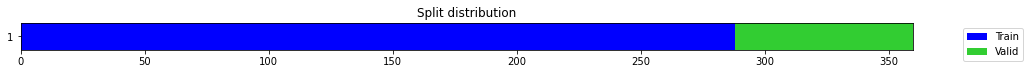

epoch,train_loss,valid_loss,accuracy,time
0,1.617594,1.775910,0.194444,00:01
1,1.390837,1.760611,0.180556,00:01
2,1.148907,1.684566,0.347222,00:01
3,0.957535,1.430617,0.777778,00:01
4,0.813310,0.969224,0.791667,00:01
5,0.710170,0.532325,0.861111,00:01
6,0.629682,0.378598,0.847222,00:01
7,0.568604,0.367301,0.847222,00:01
8,0.512299,0.568580,0.763889,00:01
9,0.473636,0.457056,0.791667,00:01


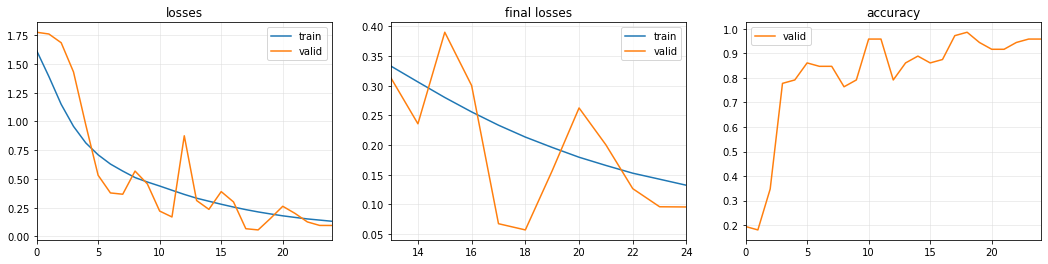

2021-12-04 14:12:08,329 - DataFactory - INFO - ...End network training


In [7]:
transforms = [TSStandardize(by_sample=True), TSMagScale(), TSWindowWarp()] # transforms applied to each batch
batch_size = [64, 128] # batchsize,  If a list of ints, the first one will be used for training, and the second for the valid
model = 'mpl' # indicates which architecture will be used

learn = datafactory.train_and_evaluate_network(X, y, model=model, batch_size=batch_size, transforms=transforms, epochs=25)

In [8]:
probas, target, preds = learn.get_X_preds(X[splits[0]], y[splits[0]]) # to use the model for prediction

We can plot the samples with their actual and predicted class:

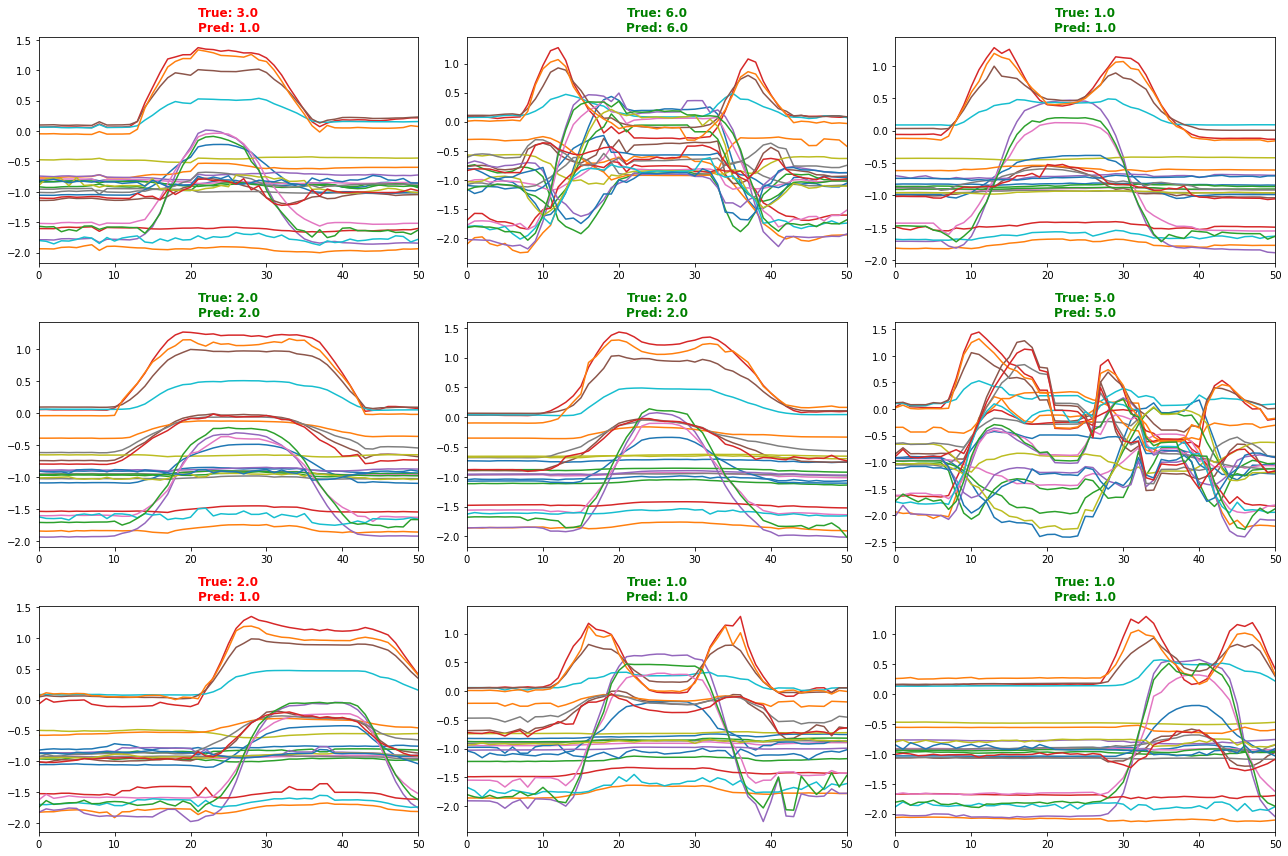

In [9]:
learn.show_results()

We can plot what are the predicted probabilies for each class, if the sample is predicted correctly:

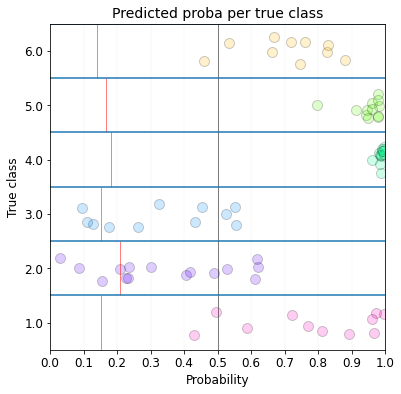

In [10]:
learn.show_probas()

We can plot a matrix which shows as which class the samples are classified comparing to their actual class:

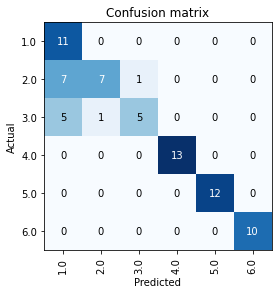

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### ResNet

ResNet was proposed from Wang et al. in 2016 ([paper](https://arxiv.org/abs/1611.06455)). It consists of three residual blocks. Each block consits of three convolutional layers each followed by batch normalization and a ReLU function. Also there is a shortcut in every residual block. At the end is a global average pooling layer and a softmax layer.

<img src="../images/res_net.png"/>

### IncetptionTime

InceptionTime was propsed from Fawaz et al. in 2019 ([paper](https://arxiv.org/abs/1909.04939)). Compared to ResNet, InceptionTime has three inception blocks instead of convolutional layer.

<img src="../images/inception_time.png"/>

### MiniRocket

MiniRocket was proposed from Dempster et al. in 2021 ([paper](https://arxiv.org/abs/2102.00457)). In contrast to the other methods is that it is a linear classifier. It transforms the input TS with random convolutional kernels and uses the transformed features to train the linear classifier. As a consequence it is less accurate then the other state-of-the-art-methods, but much faster to train.

## Comparison of the Models

2021-12-04 14:12:11,256 - DataFactory - INFO - Start network training of: mlp...


epoch,train_loss,valid_loss,accuracy,time
0,1.790854,1.779132,0.211111,00:00
1,1.781633,1.743366,0.561111,00:00
2,1.762665,1.664743,0.638889,00:00
3,1.728583,1.483404,0.672222,00:00
4,1.662693,1.086401,0.600000,00:00
5,1.547567,0.731754,0.700000,00:00
6,1.409089,0.610231,0.722222,00:00
7,1.279165,0.650294,0.661111,00:00
8,1.182036,0.625696,0.783333,00:00
9,1.108504,0.640927,0.750000,00:00


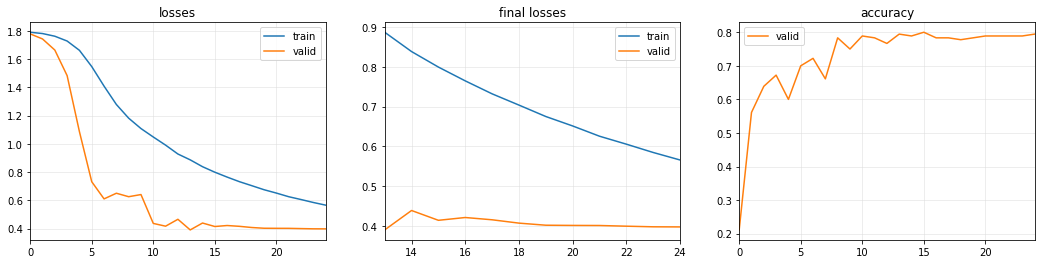

2021-12-04 14:12:14,246 - DataFactory - INFO - ...End network training
2021-12-04 14:12:14,247 - DataFactory - INFO - Start network training of: res_net...


epoch,train_loss,valid_loss,accuracy,time
0,1.892285,1.800855,0.166667,00:00
1,1.826885,1.783241,0.177778,00:00
2,1.708167,1.746095,0.294444,00:00
3,1.561072,1.659125,0.516667,00:00
4,1.418425,1.485078,0.677778,00:00
5,1.277754,1.239931,0.794444,00:00
6,1.147974,0.996350,0.850000,00:00
7,1.034972,0.791478,0.872222,00:00
8,0.938484,0.585159,0.894444,00:00
9,0.854105,0.511317,0.883333,00:00


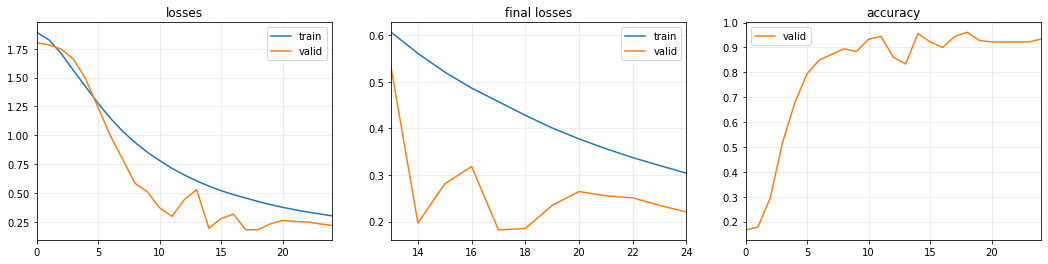

2021-12-04 14:12:25,616 - DataFactory - INFO - ...End network training
2021-12-04 14:12:25,617 - DataFactory - INFO - Start network training of: inception_time...


epoch,train_loss,valid_loss,accuracy,time
0,1.831096,1.813217,0.072222,00:00
1,1.738952,1.805916,0.144444,00:00
2,1.584233,1.795900,0.177778,00:00
3,1.431951,1.778844,0.183333,00:00
4,1.258664,1.746761,0.233333,00:00
5,1.121844,1.684292,0.450000,00:00
6,1.011617,1.572816,0.666667,00:00
7,0.918129,1.409653,0.750000,00:00
8,0.841079,1.235917,0.738889,00:00
9,0.774277,1.055002,0.816667,00:00


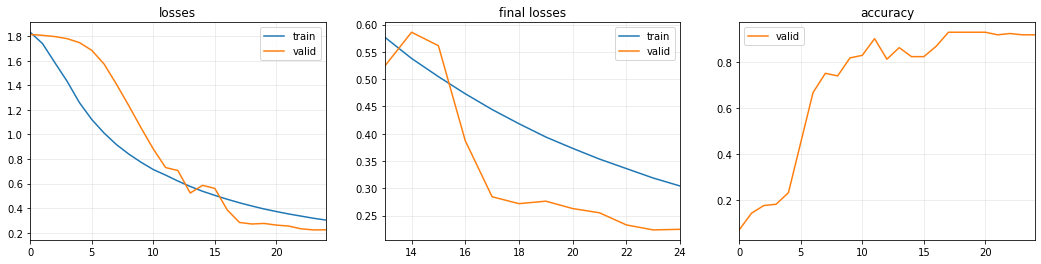

2021-12-04 14:12:44,779 - DataFactory - INFO - ...End network training
2021-12-04 14:12:44,779 - DataFactory - INFO - Start network training of: tst...


epoch,train_loss,valid_loss,accuracy,time
0,1.787510,1.730143,0.288889,00:00
1,1.695007,1.590135,0.433333,00:00
2,1.559281,1.330623,0.611111,00:00
3,1.391552,1.039580,0.633333,00:00
4,1.217262,0.841632,0.655556,00:00
5,1.068889,0.727928,0.683333,00:00
6,0.951370,0.508581,0.772222,00:01
7,0.857651,0.486196,0.761111,00:00
8,0.776072,0.591213,0.755556,00:00
9,0.712767,0.486998,0.761111,00:00


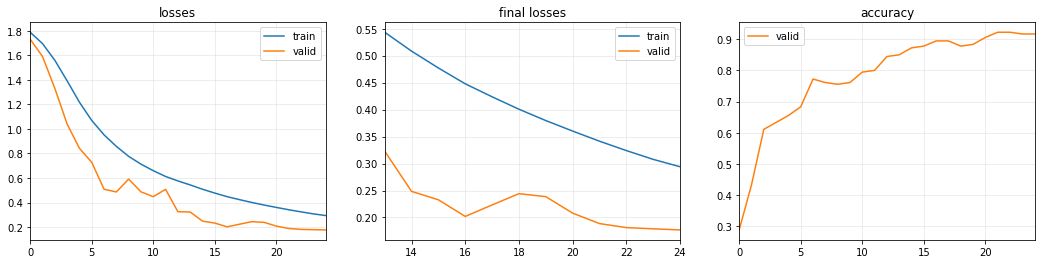

2021-12-04 14:13:09,183 - DataFactory - INFO - ...End network training
2021-12-04 14:13:09,184 - DataFactory - INFO - Start network training of: mini_rocket...


epoch,train_loss,valid_loss,accuracy,time
0,1.696548,1.741577,0.150000,00:01
1,1.464909,1.642250,0.177778,00:01
2,1.186768,1.492718,0.216667,00:01
3,0.965129,1.311013,0.450000,00:01
4,0.806215,1.089183,0.622222,00:01
5,0.692282,0.833702,0.816667,00:01
6,0.612369,0.651257,0.805556,00:01
7,0.542328,0.526391,0.844444,00:01
8,0.482374,0.436642,0.838889,00:01
9,0.430430,0.378445,0.883333,00:01


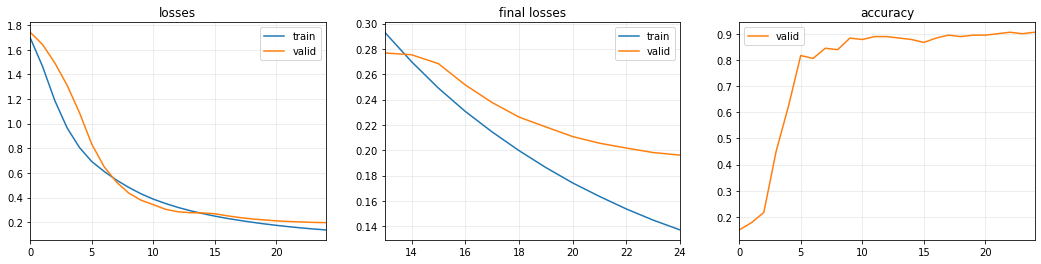

2021-12-04 14:13:38,620 - DataFactory - INFO - ...End network training
2021-12-04 14:13:38,629 - DataFactory - INFO - Start network training of: mlp...


epoch,train_loss,valid_loss,accuracy,time
0,1.396017,1.377402,0.350000,00:00
1,1.391157,1.375717,0.333333,00:00
2,1.389427,1.373937,0.416667,00:00
3,1.386201,1.371733,0.500000,00:00
4,1.383965,1.369223,0.516667,00:00
5,1.381594,1.366726,0.483333,00:00
6,1.379582,1.364168,0.466667,00:00
7,1.376803,1.361969,0.416667,00:00
8,1.372762,1.358820,0.400000,00:00
9,1.368447,1.354008,0.400000,00:00


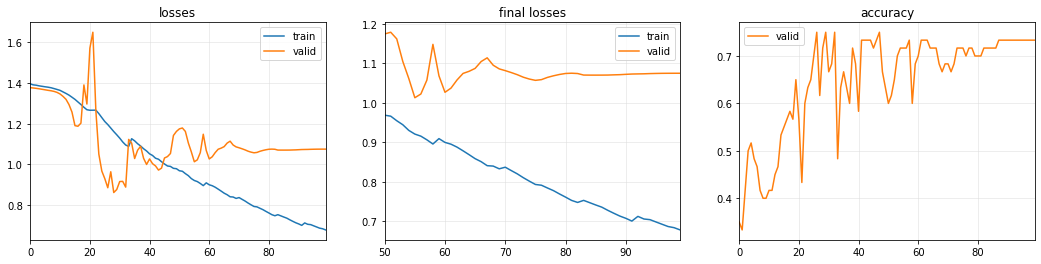

2021-12-04 14:13:43,248 - DataFactory - INFO - ...End network training
2021-12-04 14:13:43,249 - DataFactory - INFO - Start network training of: res_net...


epoch,train_loss,valid_loss,accuracy,time
0,1.471168,1.390294,0.233333,00:01
1,1.463040,1.388623,0.233333,00:01
2,1.454078,1.387217,0.233333,00:01
3,1.443563,1.386052,0.233333,00:01
4,1.432668,1.384789,0.283333,00:01
5,1.421513,1.383545,0.416667,00:01
6,1.409592,1.382413,0.266667,00:01
7,1.397878,1.381249,0.216667,00:01
8,1.385275,1.379468,0.216667,00:01
9,1.372713,1.377244,0.216667,00:01


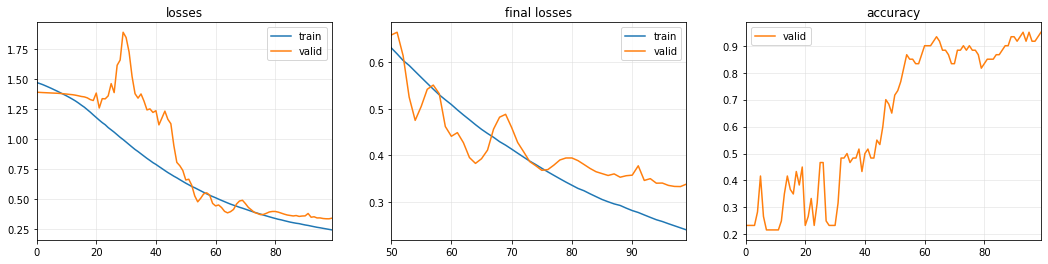

2021-12-04 14:16:07,981 - DataFactory - INFO - ...End network training
2021-12-04 14:16:07,981 - DataFactory - INFO - Start network training of: inception_time...


epoch,train_loss,valid_loss,accuracy,time
0,1.456060,1.431181,0.216667,00:02
1,1.443913,1.427911,0.216667,00:02
2,1.432328,1.425115,0.216667,00:02
3,1.421123,1.423552,0.216667,00:02
4,1.409778,1.422313,0.216667,00:02
5,1.398116,1.420949,0.216667,00:02
6,1.388333,1.419064,0.216667,00:02
7,1.378638,1.418064,0.216667,00:02
8,1.366609,1.414497,0.216667,00:02
9,1.353171,1.412427,0.216667,00:02


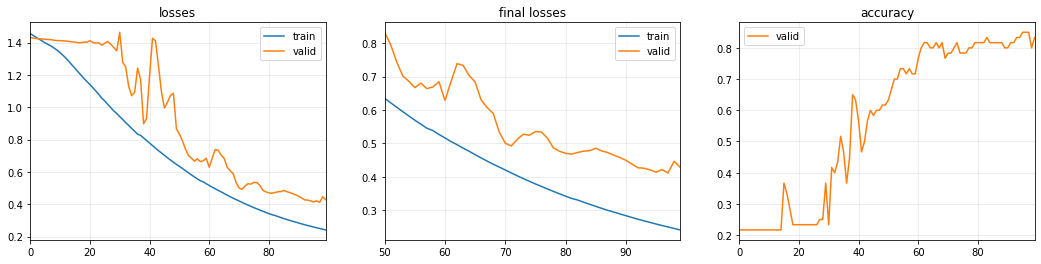

2021-12-04 14:20:22,489 - DataFactory - INFO - ...End network training
2021-12-04 14:20:22,489 - DataFactory - INFO - Start network training of: tst...


epoch,train_loss,valid_loss,accuracy,time
0,1.430764,1.537912,0.216667,00:14
1,1.414830,1.406559,0.216667,00:14
2,1.368332,1.278828,0.450000,00:14
3,1.337785,1.298577,0.466667,00:14
4,1.293483,1.287678,0.466667,00:14
5,1.253595,1.216416,0.466667,00:14
6,1.223833,1.114853,0.550000,00:14
7,1.188530,1.151339,0.566667,00:14
8,1.209924,1.379893,0.466667,00:14
9,1.180683,1.523057,0.616667,00:14


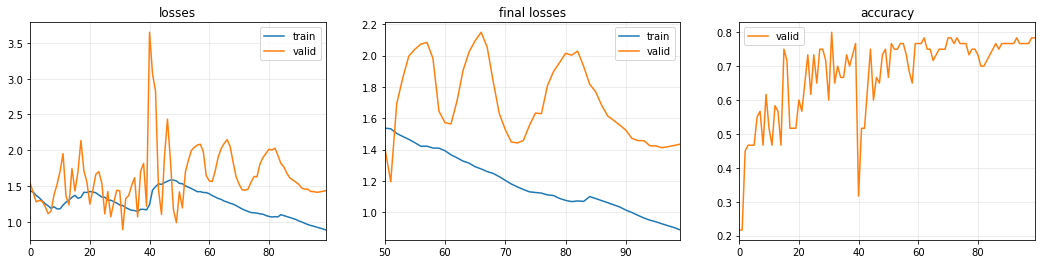

2021-12-04 14:43:35,643 - DataFactory - INFO - ...End network training
2021-12-04 14:43:35,645 - DataFactory - INFO - Start network training of: mini_rocket...


epoch,train_loss,valid_loss,accuracy,time
0,1.386293,1.381781,0.233333,00:01
1,1.304084,1.375909,0.233333,00:01
2,1.232339,1.367608,0.233333,00:01
3,1.148712,1.355769,0.266667,00:01
4,1.070294,1.339467,0.350000,00:01
5,0.990286,1.317672,0.466667,00:01
6,0.913656,1.290266,0.583333,00:01
7,0.842165,1.258529,0.600000,00:01
8,0.777101,1.220197,0.633333,00:01
9,0.716484,1.178932,0.666667,00:01


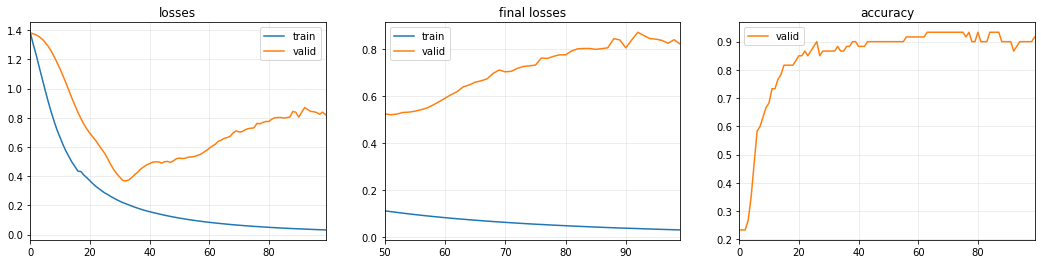

2021-12-04 14:46:29,984 - DataFactory - INFO - ...End network training
2021-12-04 14:46:30,016 - DataFactory - INFO - Start network training of: mlp...


epoch,train_loss,valid_loss,accuracy,time
0,2.493633,2.338352,0.315085,00:00
1,2.267673,2.115357,0.315085,00:00
2,2.124604,1.928275,0.344688,00:00
3,1.927476,1.730248,0.407948,00:00
4,1.724296,1.540741,0.454988,00:00
5,1.544010,1.509533,0.469181,00:00
6,1.406065,1.458064,0.506488,00:00
7,1.287811,1.462314,0.511354,00:00
8,1.147313,1.549933,0.514599,00:00
9,1.050437,1.574188,0.468370,00:00


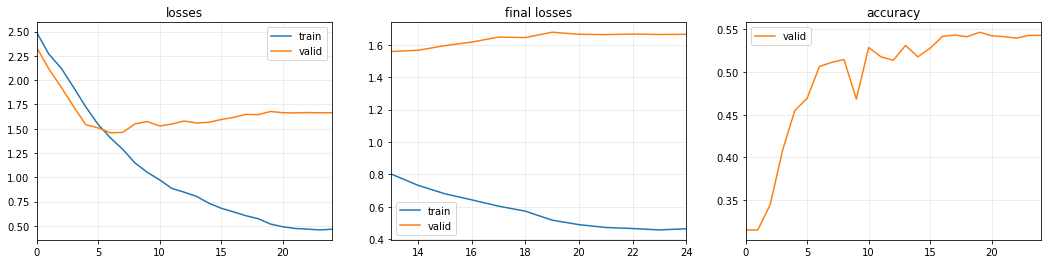

2021-12-04 14:46:49,927 - DataFactory - INFO - ...End network training
2021-12-04 14:46:49,927 - DataFactory - INFO - Start network training of: res_net...


epoch,train_loss,valid_loss,accuracy,time
0,2.450113,2.266880,0.375912,00:05
1,2.050713,1.528137,0.553934,00:05
2,1.627082,1.239964,0.604623,00:05
3,1.336131,1.114726,0.648824,00:05
4,1.147807,1.021629,0.676805,00:05
5,1.018634,1.021535,0.668289,00:05
6,0.914793,1.083339,0.639903,00:05
7,0.817231,0.963550,0.689376,00:05
8,0.733460,1.110298,0.635848,00:05
9,0.647879,1.093643,0.654096,00:06


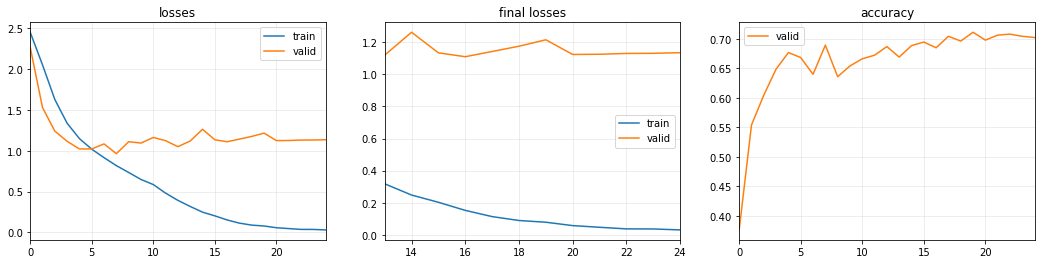

2021-12-04 14:49:17,640 - DataFactory - INFO - ...End network training
2021-12-04 14:49:17,641 - DataFactory - INFO - Start network training of: inception_time...


epoch,train_loss,valid_loss,accuracy,time
0,2.274371,2.151351,0.411598,00:09
1,1.882605,1.398833,0.582725,00:09
2,1.523142,1.219794,0.633009,00:09
3,1.264515,1.373288,0.541768,00:09
4,1.113688,1.127022,0.615977,00:09
5,1.021683,1.141733,0.639903,00:09
6,0.914505,1.262025,0.643147,00:09
7,0.844541,1.264609,0.591646,00:09
8,0.801312,1.109446,0.666261,00:09
9,0.717373,1.062201,0.633820,00:09


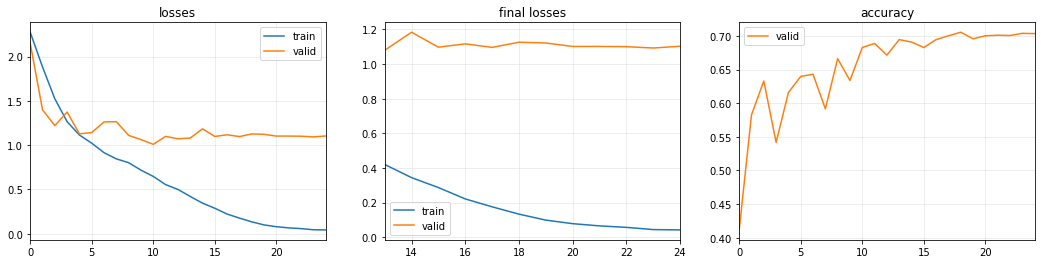

2021-12-04 14:53:15,232 - DataFactory - INFO - ...End network training
2021-12-04 14:53:15,232 - DataFactory - INFO - Start network training of: tst...


epoch,train_loss,valid_loss,accuracy,time
0,2.312470,2.063871,0.339011,00:10
1,1.988364,1.700665,0.458637,00:11
2,1.655849,1.344372,0.566504,00:12
3,1.355089,1.158106,0.615166,00:12
4,1.134257,1.181007,0.607461,00:14
5,0.977507,1.168239,0.619221,00:13
6,0.842950,1.252499,0.594891,00:12
7,0.720689,1.224277,0.625710,00:13
8,0.609377,1.265197,0.615572,00:11
9,0.514869,1.326508,0.636253,00:11


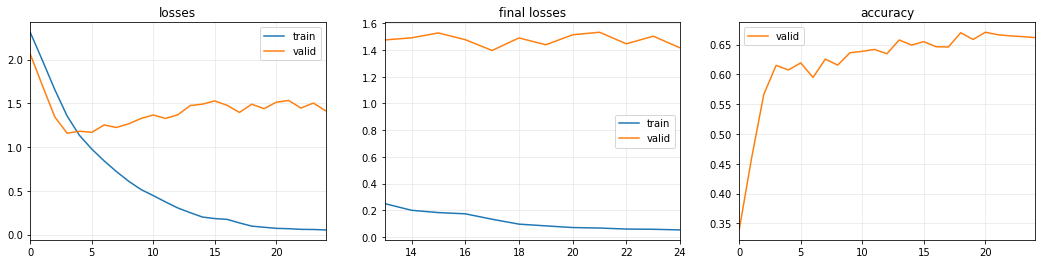

2021-12-04 14:58:19,319 - DataFactory - INFO - ...End network training
2021-12-04 14:58:19,320 - DataFactory - INFO - Start network training of: mini_rocket...


epoch,train_loss,valid_loss,accuracy,time
0,1.996523,1.858715,0.495134,00:05
1,1.576709,1.284185,0.620438,00:06
2,1.301636,1.208498,0.634631,00:05
3,1.150022,1.251447,0.609084,00:05
4,1.068199,1.354512,0.622060,00:06
5,1.007147,1.464329,0.603812,00:05
6,0.900342,1.534383,0.607867,00:07
7,0.806066,1.390810,0.647607,00:07
8,0.694156,1.464942,0.637875,00:06
9,0.635532,1.380156,0.644363,00:06


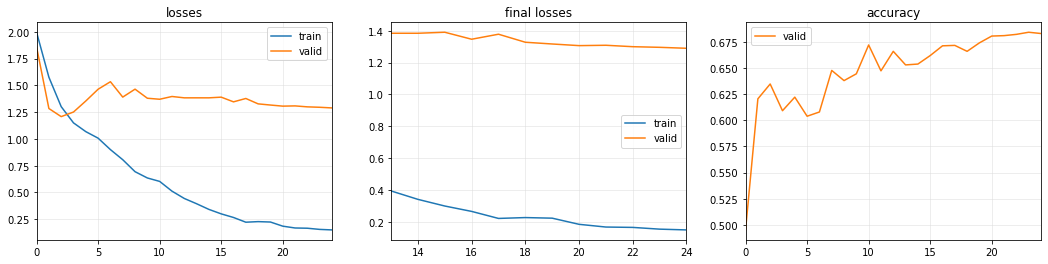

2021-12-04 15:01:03,842 - DataFactory - INFO - ...End network training


In [12]:
results = compare_networks(['mlp', 'res_net', 'inception_time', 'tst', 'mini_rocket'])

Here we can also see how important it is to select the right model. This table shows the end accuracy for each model on different datasets:

In [13]:
results

,Models,NATOPS Dataset,Car Dataset,LSST Dataset
0,MLP,0.794444,0.733333,0.542985
1,ResNet,0.933333,0.950000,0.702352
2,InceptionTime,0.916667,0.833333,0.703569
3,TST,0.916667,0.783333,0.661801
4,MiniRocket,0.905556,0.916667,0.682887


In [14]:
datx = [results['Models'].tolist()]
daty = [results['NATOPS Dataset'].tolist(), results['Car Dataset'].tolist(), results['LSST Dataset'].tolist()]

Here as plots:

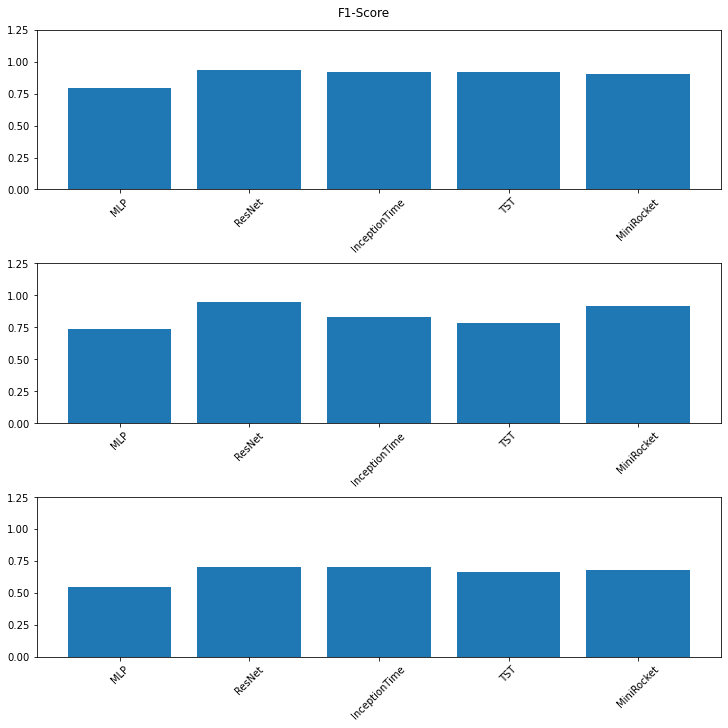

<Figure size 432x288 with 0 Axes>

In [15]:
datafactory.plot_model_comparison(datx, daty, ptype='bar', title='F1-Score')